In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
DATASET_COLUMNS=['Playtime','Review']
DATASET_ENCODING = "ISO-8859-1"

file_path = '/content/drive/My Drive/Colab Notebooks/hogwarts_legacy_reviews.csv'

# Using pandas to read CSV files
df = pd.read_csv(file_path,encoding=DATASET_ENCODING, names=DATASET_COLUMNS)


In [ ]:
# Data Cleaning
# Remove duplicates
df.drop_duplicates(subset="Review", inplace=True)

# Handle missing data
df.dropna(subset="Review", inplace=True)

In [ ]:
df.head()

,Playtime,Review
ï»¿0,16,Greattt Game!
1,26,9/10Fantastic experience. A true Wizarding Wor...
2,29,worth it
3,24,I've been waiting 84 YEARSSSSSSSS.The game is ...
4,7,very fun game (it is not transphobic at all)


In [ ]:
!pip install textblob



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Use the 'nltk' library (Natural Language Toolkit) to download English stop words.
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
new_stopwords = ["all", "due", "to", "on", "daily"]
# stpwrd.extend(new_stopwords)
def cleaning_stopwords(Review):
    return " ".join([word for word in str(Review).split() if word not in stop_words])
df['Review'] = df['Review'].apply(lambda text: cleaning_stopwords(text))
df['Review'].head()

ï»¿0                                        Greattt Game!
1       9/10Fantastic experience. A true Wizarding Wor...
2                                                   worth
3       I've waiting 84 YEARSSSSSSSS.The game everythi...
4                           fun game (it transphobic all)
Name: Review, dtype: object

In [ ]:
# Remove URLs
def remove_URLs(data):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
df['Review'] = df['Review'].apply(lambda x: remove_URLs(x))

In [ ]:
# Remove punctuations
def remove_punctuations(data):
    return re.sub(r"[~.,%/:;?_&+*=!-]"," ",data)
df['Review']= df['Review'].apply(lambda x: remove_punctuations(x))

In [ ]:
# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
df['Review'] = df['Review'].apply(lambda x: remove_numbers(x))

In [ ]:
# Stemming text data using the 'nltk' library
import nltk
st = nltk.PorterStemmer()
def stemming_on_Review(data):
    Review = [st.stem(word) for word in data]
    return data
df['Review']= df['Review'].apply(lambda x: stemming_on_Review(x))

In [ ]:
# Using the 'nltk' library for text lemmatization
import nltk
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_Review(data):
    Review = [lm.lemmatize(word) for word in data]
    return data
df['Review'] = df['Review'].apply(lambda x: lemmatizer_on_Review(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from scipy.special import softmax

# Load pre-trained model and tokenizer
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)
model.to('cpu')  # Ensure model is on CPU, change to 'cuda' if GPU is available

# Define a function to process reviews in batches
def sentiment_scores(reviews, batch_size=10):
    results = []
    for i in range(0, len(reviews), batch_size):
        batch = reviews[i:i+batch_size]
        encoded_reviews = tokenizer(batch, padding=True, truncation=True, max_length=512, return_tensors='pt')
        input_ids = encoded_reviews['input_ids'].to('cpu')
        attention_mask = encoded_reviews['attention_mask'].to('cpu')

        with torch.no_grad():
            outputs = model(input_ids, attention_mask)
            scores = outputs.logits.detach().numpy()
            scores = softmax(scores, axis=1)
            results.extend(scores)
    return results

# Function to categorize sentiment based on scores from RoBERTa
def sentiment_category(scores):
    label = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
    return label[scores.argmax()]

# Load your DataFrame
# df = pd.read_csv('your_reviews_file.csv')

# Apply the batch sentiment analysis
df['Scores'] = sentiment_scores(df['Review'].tolist())
df['Sentiment_Category'] = [sentiment_category(score) for score in df['Scores']]

# Display the modified DataFrame
print(df.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

      Playtime                                             Review  \
ï»¿0        16                                      Greattt Game    
1           26   Fantastic experience  A true Wizarding World ...   
2           29                                              worth   
3           24  I've waiting  YEARSSSSSSSS The game everything...   
4            7                      fun game (it transphobic all)   

                                       Scores Sentiment_Category  
ï»¿0    [0.005611102, 0.060094267, 0.9342946]           POSITIVE  
1     [0.0025781218, 0.031021982, 0.96639985]           POSITIVE  
2         [0.22944425, 0.54094285, 0.2296129]            NEUTRAL  
3        [0.02106648, 0.10134634, 0.87758714]           POSITIVE  
4          [0.2510952, 0.43749636, 0.3114084]            NEUTRAL  


In [ ]:
df.head()

,Playtime,Review,Scores,Sentiment_Category
ï»¿0,16,Greattt Game,"[0.005611102, 0.060094267, 0.9342946]",POSITIVE
1,26,Fantastic experience A true Wizarding World ...,"[0.0025781218, 0.031021982, 0.96639985]",POSITIVE
2,29,worth,"[0.22944425, 0.54094285, 0.2296129]",NEUTRAL
3,24,I've waiting YEARSSSSSSSS The game everything...,"[0.02106648, 0.10134634, 0.87758714]",POSITIVE
4,7,fun game (it transphobic all),"[0.2510952, 0.43749636, 0.3114084]",NEUTRAL


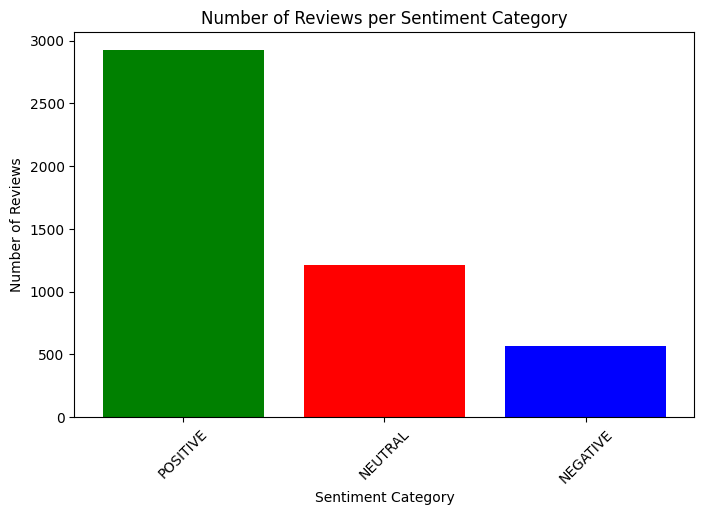

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of comments for each category
sentiment_counts = df['Sentiment_Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))  # Set graphic size
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])  # Set different colors for different emotional categories

plt.title('Number of Reviews per Sentiment Category')  # Add title
plt.xlabel('Sentiment Category')  # Add x-axis labels
plt.ylabel('Number of Reviews')  # Add y-axis labels
plt.xticks(rotation=45)  # Rotate the x-axis label 45 degrees for clearer display
plt.show()  # Display graphics


Text Preprocessing

In [ ]:
df.head()

,Playtime,Review,Scores,Sentiment_Category
ï»¿0,16,Greattt Game,"[0.005611102, 0.060094267, 0.9342946]",POSITIVE
1,26,Fantastic experience A true Wizarding World ...,"[0.0025781218, 0.031021982, 0.96639985]",POSITIVE
2,29,worth,"[0.22944425, 0.54094285, 0.2296129]",NEUTRAL
3,24,I've waiting YEARSSSSSSSS The game everything...,"[0.02106648, 0.10134634, 0.87758714]",POSITIVE
4,7,fun game (it transphobic all),"[0.2510952, 0.43749636, 0.3114084]",NEUTRAL


In [ ]:
!pip install wordcloud


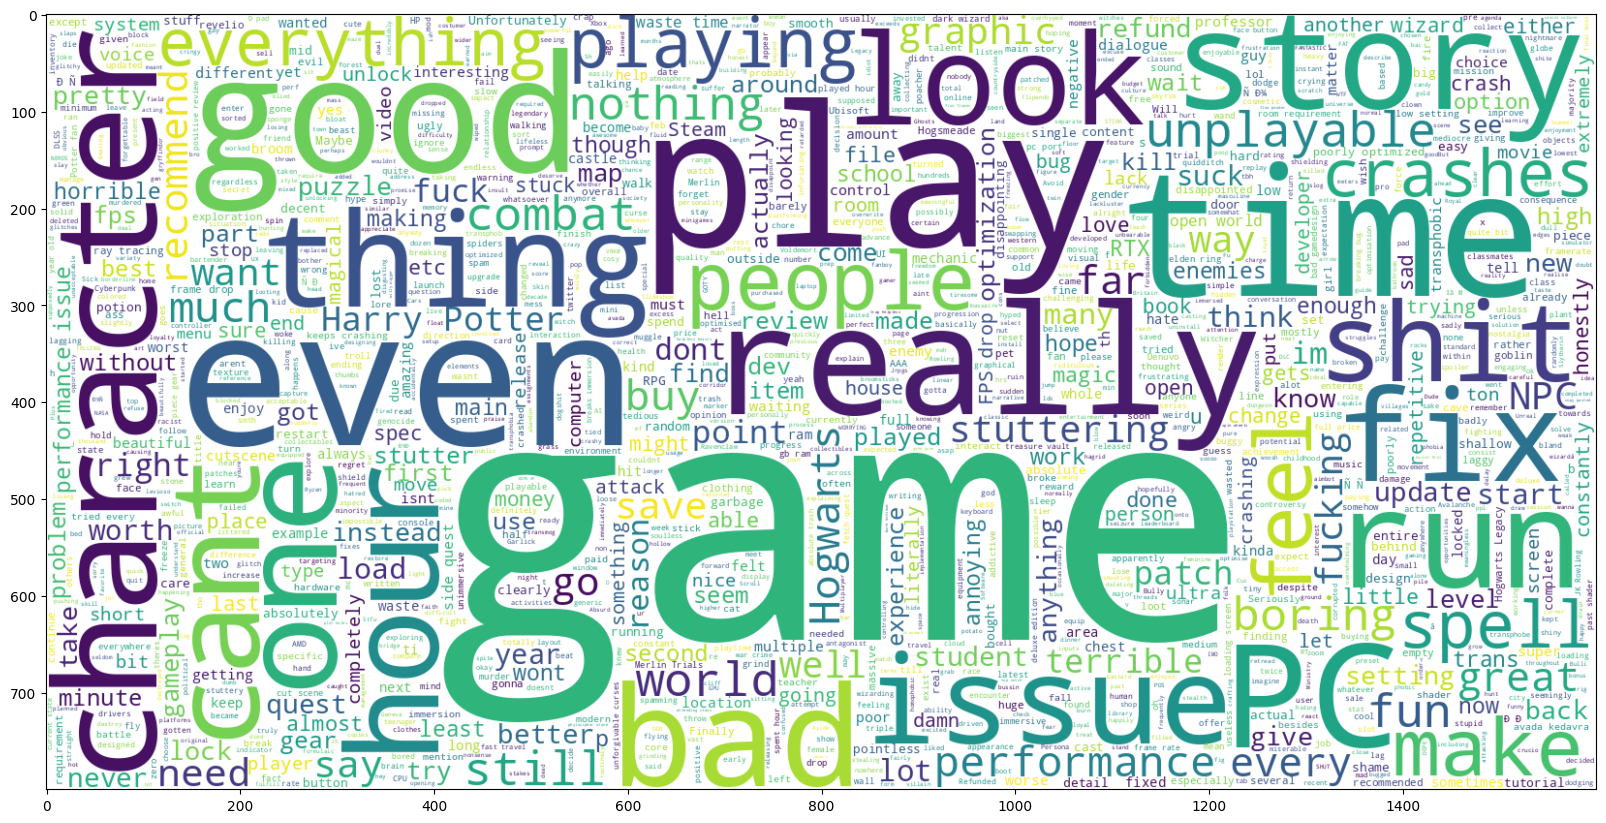

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) # Set graphic size
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Sentiment_Category == 'NEGATIVE'].Review)) # Create a WordCloud object
plt.imshow(wc , interpolation = 'bilinear')   # Display word cloud

In [ ]:
!pip install contractions
!pip install pyLDAvis

import pandas as pd
import unicodedata
import re
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
#spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim_models


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.9 MB/s eta 0:00:00


In [ ]:
df['Review'].isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
# The LDA topic model algorithm requires a document word matrix and a dictionary as the main inputs.
# A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents.
# In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.
# A Dictionary is collection of all unique tokens present in documents.
# For generating the document-term matrix and dictionary, first we will convert our sentences into tokens using the fucntion mentioned below.
# stop_words = set(['the','a'])
def generate_tokens(Review):
    words=[]
    for word in Review.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
         # if word != '' and word not in stop_words:
        if word!='':
           words.append(word)
    return words
#storing the generated tokens in a new column named 'tokens'
df['tokens']=df.Review.apply(generate_tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df.head())

      Playtime                                             Review  \
ï»¿0        16                                      Greattt Game    
1           26   Fantastic experience  A true Wizarding World ...   
2           29                                              worth   
3           24  I've waiting  YEARSSSSSSSS The game everything...   
4            7                      fun game (it transphobic all)   

                                       Scores Sentiment_Category  \
ï»¿0    [0.005611102, 0.060094267, 0.9342946]           POSITIVE   
1     [0.0025781218, 0.031021982, 0.96639985]           POSITIVE   
2         [0.22944425, 0.54094285, 0.2296129]            NEUTRAL   
3        [0.02106648, 0.10134634, 0.87758714]           POSITIVE   
4          [0.2510952, 0.43749636, 0.3114084]            NEUTRAL   

                                                 tokens  
ï»¿0                                    [Greattt, Game]  
1     [Fantastic, experience, A, true, Wizarding, Wo...  
2 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['tokens'][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Greattt', 'Game']

In [ ]:
import gensim.corpora as corpora


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert a set of segmented texts (word lists for each document) into a dictionary format that can be used for further text analysis, such as in topic modeling or similarity analysis.
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(df['tokens'])
print(id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary<9027 unique tokens: ['Game', 'Greattt', 'A', 'And', 'Fantastic']...>


In [ ]:
# Create a document vocabulary matrix (corpus) from the tokenization results of a set of documents
def create_document_matrix(tokens,id2word):
    corpus = []
    for Review in tokens:
        corpus.append(id2word.doc2bow(Review))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(df['tokens'],id2word)
print(df['tokens'][0])
print(corpus[0])

['Greattt', 'Game']
[(0, 1), (1, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create an LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                             )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# We used the pyLDAvis library to visualize the results of the LDA topic model created by the gensim library
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.145619  0.052471       1        1  17.717292
6     -0.034140  0.056577       2        1  16.888300
5     -0.059012  0.136465       3        1  14.940039
7      0.101355 -0.008259       4        1  14.901070
3      0.168026 -0.048575       5        1   9.061548
4      0.085826  0.060915       6        1   8.605241
0      0.073832  0.159274       7        1   5.816809
9      0.028619 -0.139163       8        1   4.186329
1     -0.122145 -0.078742       9        1   4.168875
2     -0.096742 -0.190964      10        1   3.714496, topic_info=          Term        Freq       Total Category  logprob  loglift
40       Harry  296.000000  296.000000  Default  30.0000  30.0000
42      Potter  279.000000  279.000000  Default  29.0000  29.0000
0         Game  189.000000  189.000000  Default  28.0000  28.0000
184       good  559.000000  559.000000  Default  27.0000  27.0000
540       It's  178.000000  178.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
213        You   12.268044   95.144912  Topic10  -5.1402   1.2445
2431      cast    7.477877   22.697760  Topic10  -5.6353   2.1826
196   Hogwarts   11.412515  172.873035  Topic10  -5.2125   0.5751
91      wizard    9.466077  126.997681  Topic10  -5.3995   0.6965
540       It's    8.020722  178.334430  Topic10  -5.5652   0.1913

[741 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2403     10  0.881941  "magical"
2372      3  0.291193          $
2372      4  0.181995          $
2372      6  0.109197          $
2372      8  0.363991          $
...     ...       ...        ...
3159      3  0.065447        yes
3159      7  0.065447        yes
1566      4  0.877327      youll
4564      3  0.923904        â¥
4019      8  0.835681        ã

[1989 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 6, 8, 4, 5, 1, 10, 2, 3])

In [ ]:
topic_words = {}
n_words = 10  # Extract the top 10 words with the highest weight for each topic

for i in range(10):  # Assuming there are 10 themes
    tt = lda_model.show_topic(i, topn=n_words)
    topic_words['Topic ' + str(i)] = [word for word, weight in tt]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


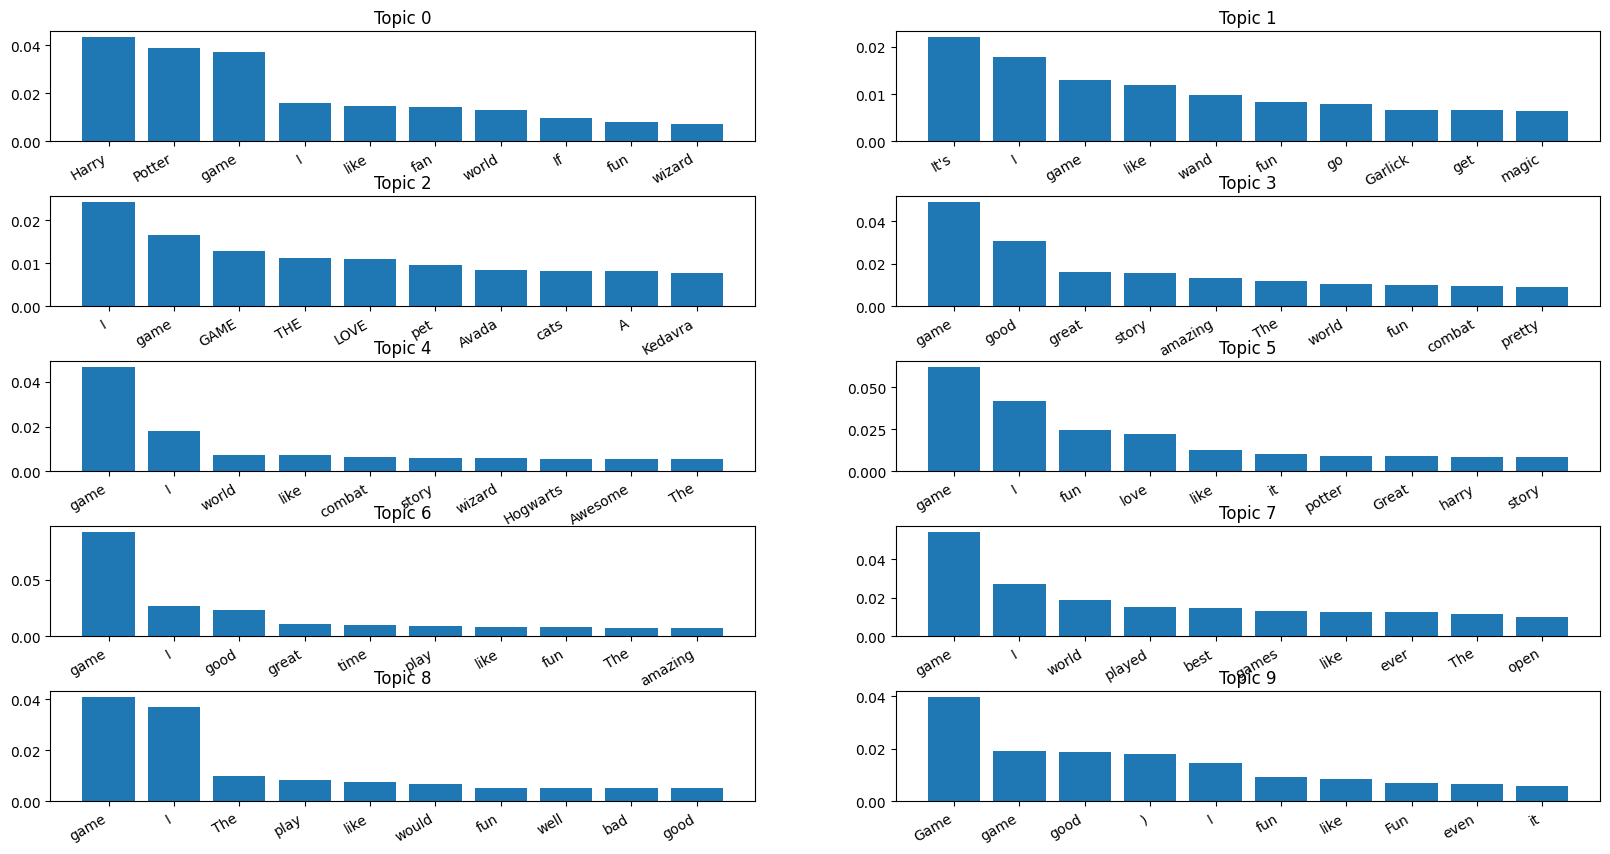

In [ ]:
import matplotlib.pyplot as plt

# Set the size of the chart
plt.figure(figsize=(20,10))

# Traverse each topic
for i, topic in enumerate(topic_words.keys()):
    plt.subplot(5, 2, i+1)  # Create a subgraph, assuming you have a subgraph layout of 5 rows and 2 columns
    plt.title(topic)
    words = topic_words[topic]
    weights = [weight for word, weight in lda_model.show_topic(i, topn=n_words)]
    plt.bar(range(n_words), weights)
    plt.xticks(range(n_words), words, rotation=30, ha='right')  # Rotate words 30 degrees for reading

# Adjust the spacing between subgraphs
plt.subplots_adjust(hspace=0.5)
plt.show()
